# **DISCLAIMER**

*PLEASE NOTE: THIS ANALYSIS IS INCOMPLETE AND BEING CONTINUALLY DEVELOPED*

*IT IS A 'PLAYGROUND' FOR PYTHON PRACTICE. FOR THE MOST UPDATED REPRESENTATION OF MY ANALYSIS SKILLS, PLEASE VIEW THE LOAN DEFAULT MODELING PROJECT:*

**LOAN DEFAULT MODELING:**
* [WhitePaper]('https://github.com/adamkahle-isa/Business-Analytics/blob/main/Data%20Mining%20%26%20ML/Loan_Default_Classificaiton.pdf').
* [Jupyter Notebook]('https://github.com/adamkahle-isa/Business-Analytics/blob/main/Data%20Mining%20%26%20ML/loan_default_classification.ipynb').

# **Dunnhunby The Complete Journey Analysis**
#### Adam Kahle, MSBA Candidate

## **INSTALL DATASETS**

#### **DATASET**

This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included.

In [77]:
## imports
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
## kaggle connection
path = kagglehub.dataset_download("frtgnn/dunnhumby-the-complete-journey")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dunnhumby-the-complete-journey


In [79]:
## datasets
campaign_desc = pd.read_csv(f'{path}/campaign_desc.csv')
campaign_table = pd.read_csv(f'{path}/campaign_table.csv')
coupon = pd.read_csv(f'{path}/coupon.csv')
coupon_redempt = pd.read_csv(f'{path}/coupon_redempt.csv')
transaction_data = pd.read_csv(f'{path}/transaction_data.csv')
hh_demographic = pd.read_csv(f'{path}/hh_demographic.csv')
product = pd.read_csv(f'{path}/product.csv')

In [80]:
## download data to csv if needed
## campaign_desc.to_csv('campaign_desc.csv', index=False)
## campaign_table.to_csv('campaign_table.csv', index=False)
## coupon.to_csv('coupon.csv', index=False)
## coupon_redempt.to_csv('coupon_redempt.csv', index=False)
## transaction_data.to_csv('transaction_data.csv', index=False)
## hh_demographic.to_csv('hh_demographic.csv', index=False)
## product.to_csv('product.csv', index=False)

## **PREVIEW DATASETS**

### **CAMPAIGN DESCRIPTION TABLE**


Campaign description data is a look up table, containing the start and the end days of each campaign (30 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C).

In [81]:
## preview campaign desc
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [82]:
## preview campaign desc
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


### **CAMPAIGN TABLE**

Campaign dataset contains identifying information for the marketing campaigns each household participated in.

In [83]:
## preview campaign table
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [84]:
## preview campaign table info
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


### **COUPONS**

Is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

In [85]:
## preview coupon
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [86]:
## preview coupon info
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


### **COUPON REDEMPTIONS**

Is a data table, ordered by household_key, gives which household redeemed what coupon number. Also the day of the redeem and the campaign number is given for each household.

In [87]:
## preview coupon redempt
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [88]:
## preview coupon info
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


### **TRANSACTION DATA**

Transactional data contains purchase history of each household. It contains the product ID and sales value, store ID and all other transactional features.

In [89]:
## preview transaction data
transaction_data.head(25)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0
5,2375,26984851516,1,826249,2,1.98,364,-0.60,1642,1,0.0,0.0
6,2375,26984851516,1,1043142,1,1.57,364,-0.68,1642,1,0.0,0.0
7,2375,26984851516,1,1085983,1,2.99,364,-0.40,1642,1,0.0,0.0
8,2375,26984851516,1,1102651,1,1.89,364,0.00,1642,1,0.0,0.0
9,2375,26984851516,1,6423775,1,2.00,364,-0.79,1642,1,0.0,0.0


In [90]:
## preview transaction data
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


### **DEMOGRAPHIC DATA**

Demographics data contains household demographical information such as age group, marital status and househols size. We will be using this table as a base and add few columns after feature engineering. Target variable for the churn prediction will be added in the final dataset before moving on to the predictive modelling.

In [91]:
## preview transaction data
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [92]:
## preview demographic data
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


### **PRODUCT**

The product table contains data on information on each product. Everything from manufacturer, brand, department, commodity descriptions and sub_commodirt descriptions, etc.

In [93]:
## preview product data
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [94]:
## preview product data
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


## **EXPLORATORY DATA ANALYSIS**

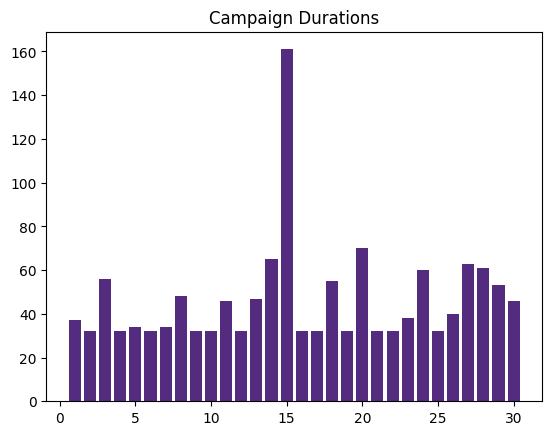

In [95]:
## let's explore the campaign lengths
campaign_desc['LENGTH'] = campaign_desc['END_DAY'] - campaign_desc['START_DAY']

## using 84.51's primary color
primary = '#532C7F'

## visualizing
plt.bar(campaign_desc['CAMPAIGN'], campaign_desc['LENGTH'], color = primary)
plt.title("Campaign Durations")
plt.show();

In [96]:
## avg length
campaign_desc['LENGTH'].describe().T

,LENGTH
count,30.000000
mean,46.600000
std,24.856277
min,32.000000
25%,32.000000
50%,37.500000
75%,54.500000
max,161.000000


**We see the most campaigns lasted between 1 and 2 months. How were these campaigns distributed across households?**

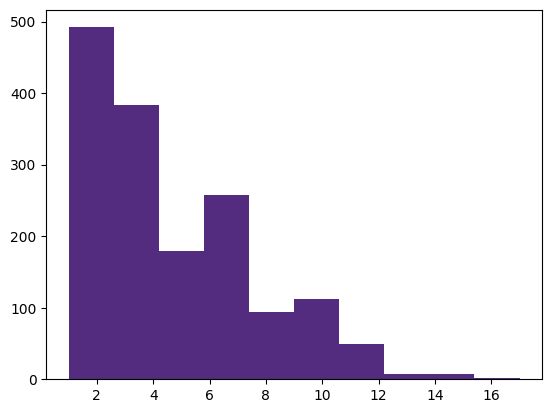

In [97]:
## househould value counts
plt.hist(campaign_table['household_key'].value_counts(), color = primary);

In [98]:
## nunique
campaign_table['household_key'].nunique()

1584

In [99]:
## distribution
campaign_table['household_key'].value_counts().describe()

,count
count,1584.000000
mean,4.550505
std,2.993988
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,17.000000


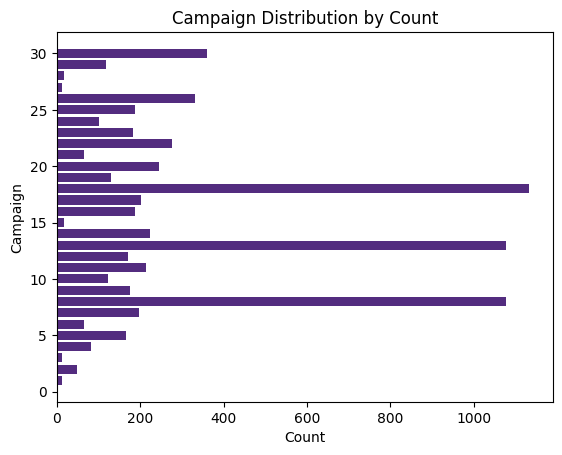

In [100]:
## what campaigns were these?
campaign_counts = campaign_table['CAMPAIGN'].value_counts()
plt.barh(campaign_counts.index, campaign_counts.values, color = primary);
plt.title("Campaign Distribution by Count")
plt.xlabel("Count")
plt.ylabel("Campaign")
plt.show();

**1584 households received at least one campaign out of the original 2500 households. The median quantity of campaigns received was 4. The most common campaigns received were 18,13 and 8. What campaigns were redeemed?**

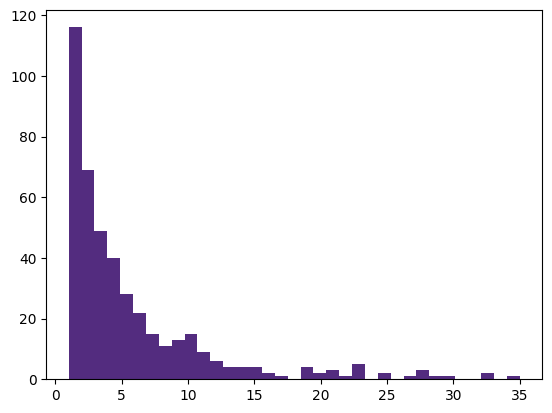

In [101]:
## lengths
plt.hist(coupon_redempt['household_key'].value_counts(), color = primary, bins= 35);

In [102]:
## distribution
coupon_redempt['household_key'].value_counts().describe()

,count
count,434.000000
mean,5.341014
std,6.052413
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,35.000000


In [103]:
434/2500

0.1736

In [104]:
## redemption rates
campaign_desc.sort_values('CAMPAIGN', inplace = True)
rates = coupon_redempt['CAMPAIGN'].value_counts().sort_index() / campaign_table['CAMPAIGN'].value_counts().sort_index()
campaign_desc.set_index('CAMPAIGN', inplace = True)
campaign_desc['redemption_rate'] = rates

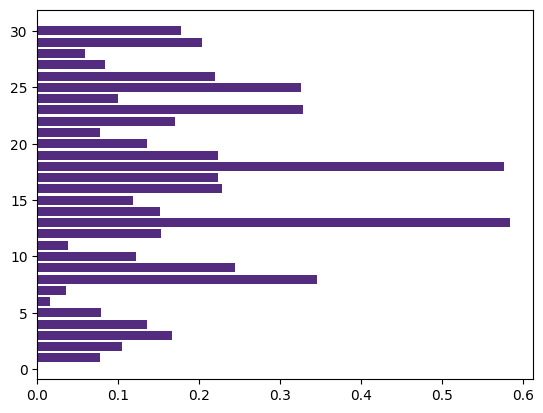

In [105]:
## visualize the top rates
plt.barh(campaign_desc.index , campaign_desc['redemption_rate'], color = primary);

**17% (434) of the original 2500 households redeemed coupons. Of those, the median number of coupons redeemed was 3. The best converting of these were campaigns 18,13, and 8. What demographics were redeeming coupons?**

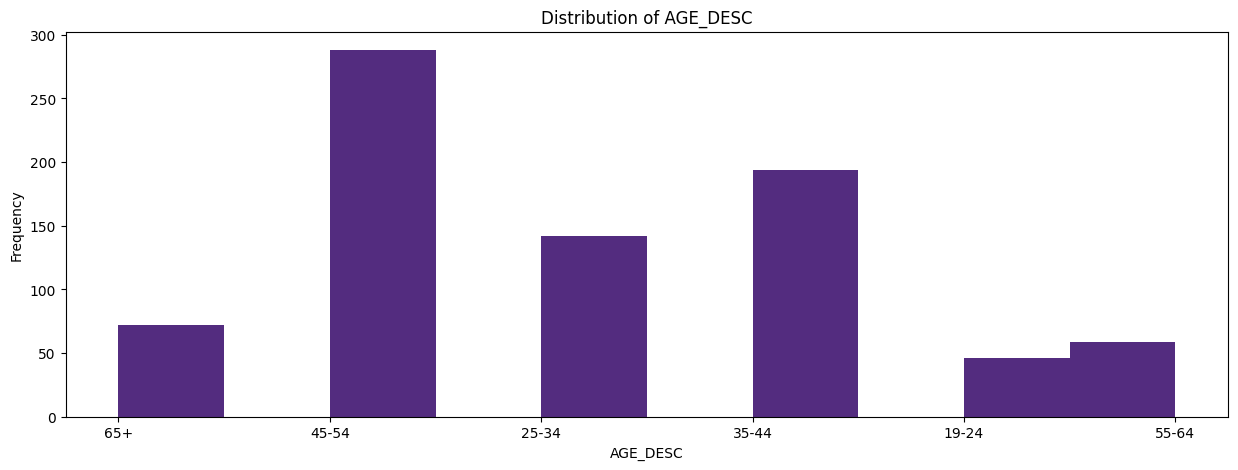

count       801
unique        6
top       45-54
freq        288
Name: AGE_DESC, dtype: object




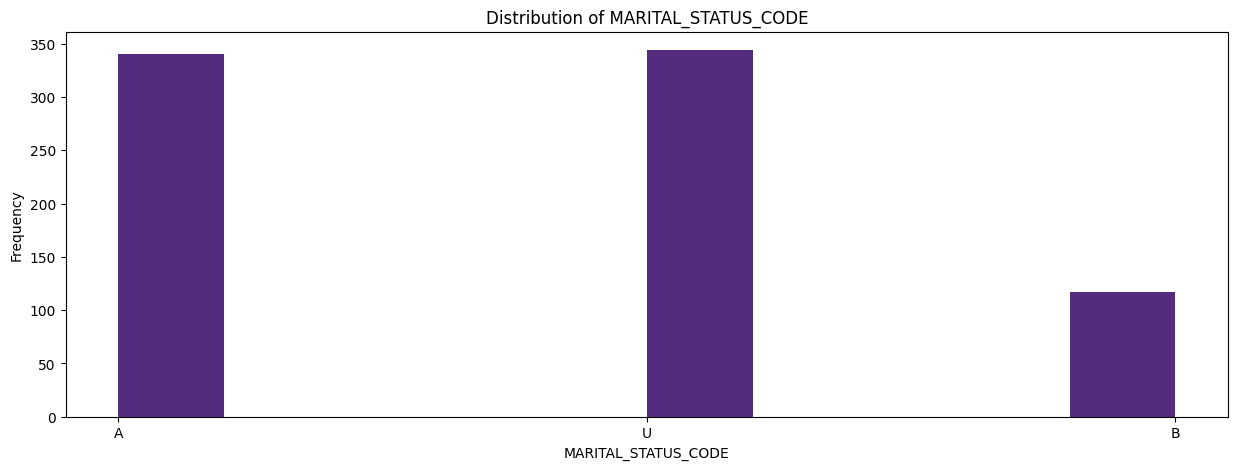

count     801
unique      3
top         U
freq      344
Name: MARITAL_STATUS_CODE, dtype: object




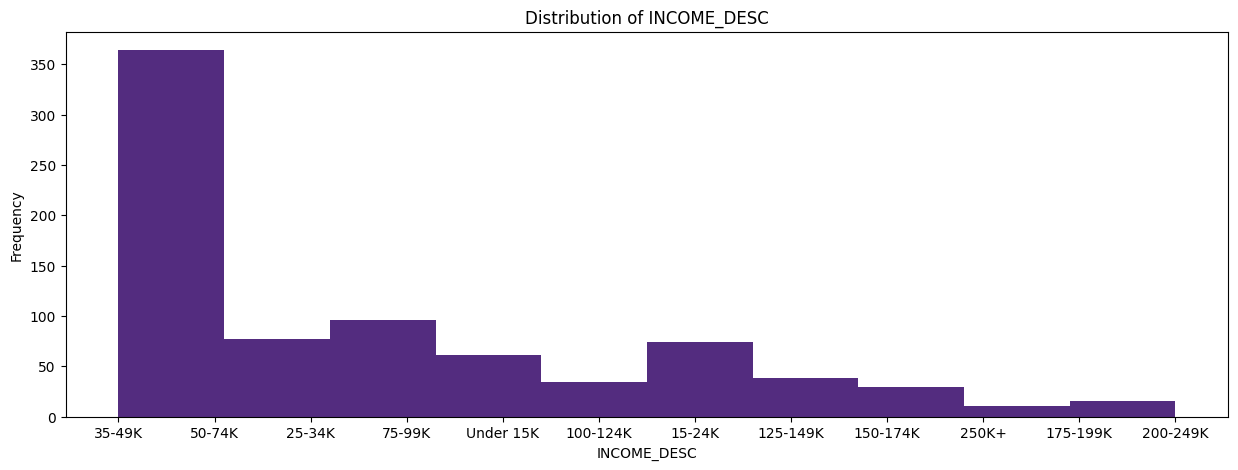

count        801
unique        12
top       50-74K
freq         192
Name: INCOME_DESC, dtype: object




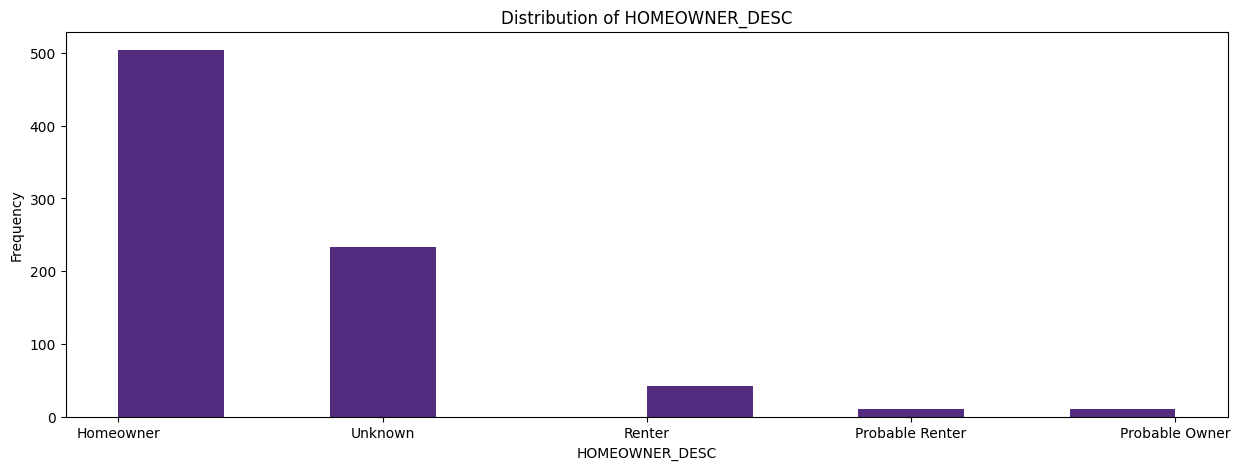

count           801
unique            5
top       Homeowner
freq            504
Name: HOMEOWNER_DESC, dtype: object




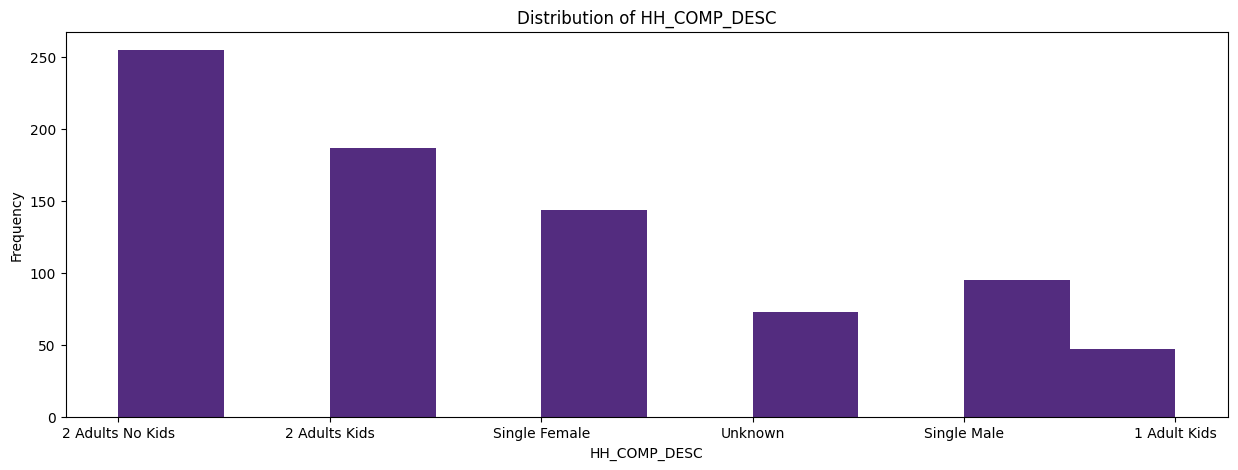

count                  801
unique                   6
top       2 Adults No Kids
freq                   255
Name: HH_COMP_DESC, dtype: object




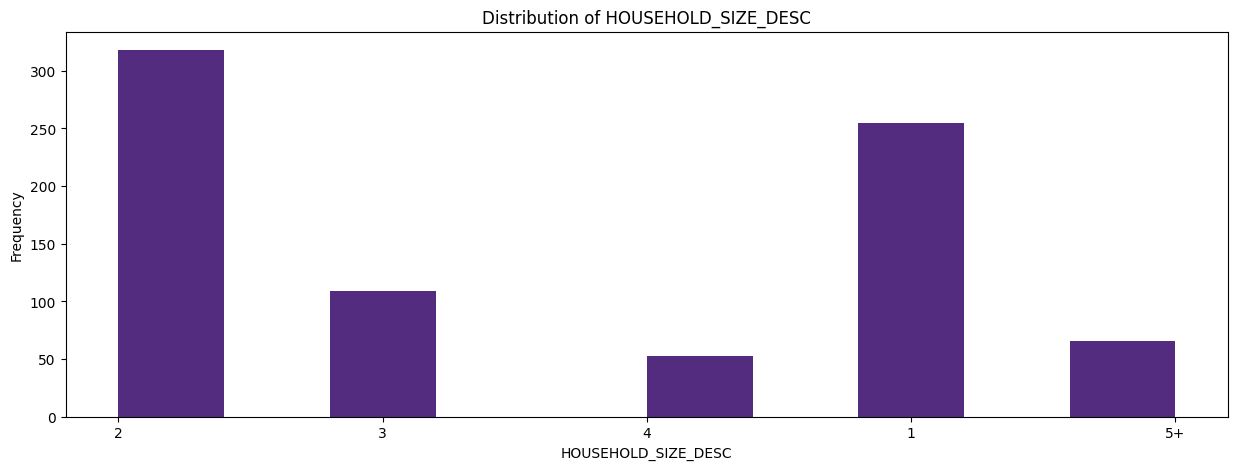

count     801
unique      5
top         2
freq      318
Name: HOUSEHOLD_SIZE_DESC, dtype: object




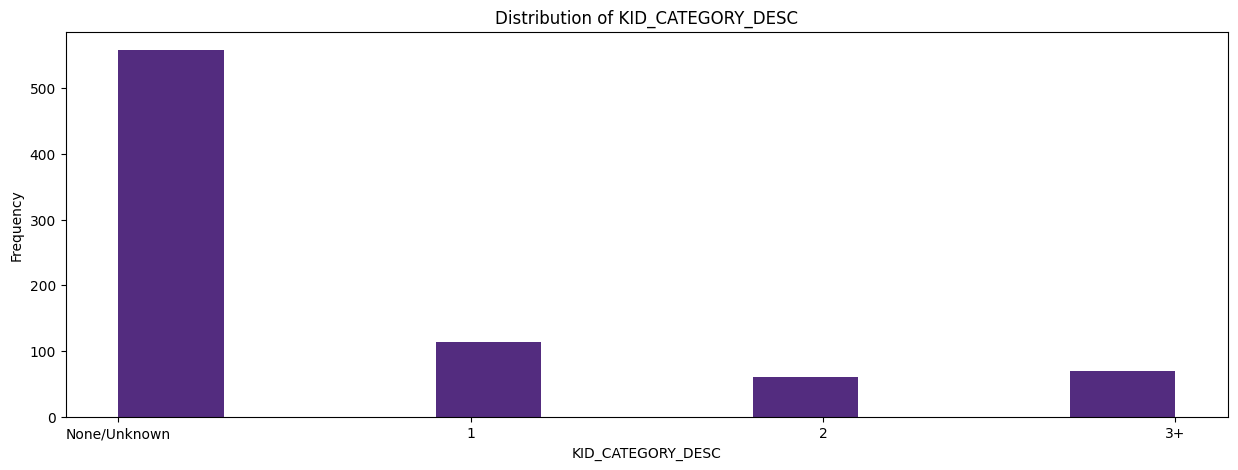

count              801
unique               4
top       None/Unknown
freq               558
Name: KID_CATEGORY_DESC, dtype: object




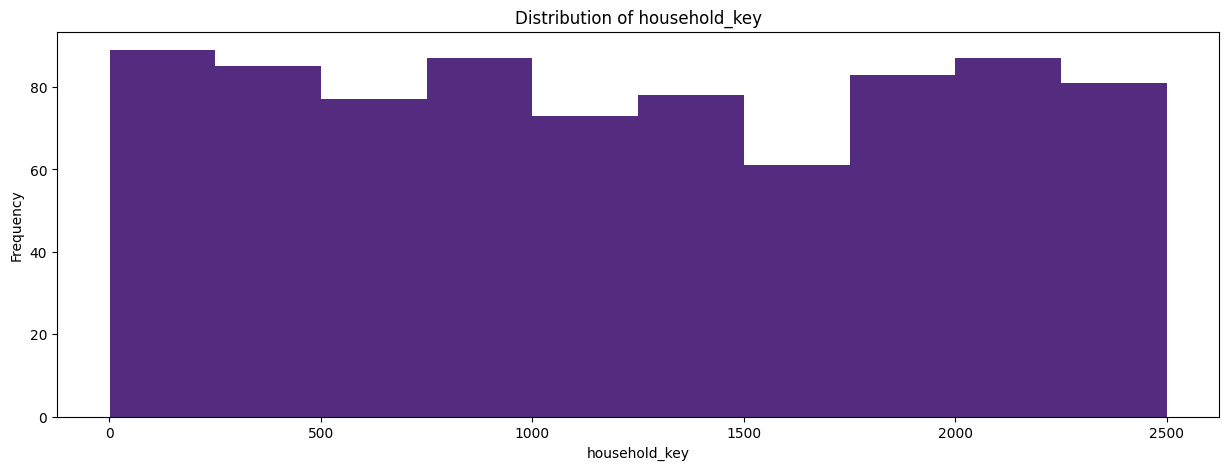

count     801.000000
mean     1235.176030
std       736.804647
min         1.000000
25%       596.000000
50%      1218.000000
75%      1914.000000
max      2499.000000
Name: household_key, dtype: float64




In [106]:
## analyzing households broadly

for i in hh_demographic.columns:
  plt.figure(figsize = (15,5))
  plt.hist(hh_demographic[i].dropna(), color = primary); # Call hist on the Series, not plt
  plt.title(f'Distribution of {i}') # Add a title for clarity
  plt.xlabel(i) # Add x-label
  plt.ylabel('Frequency') # Add y-label
  plt.show(); # Display each plot
  print(hh_demographic[i].describe())
  print('\n')

In [107]:
## coupon
transaction_data['COUPON_DISC'].value_counts()

,count
COUPON_DISC,
0.00,2559310
-1.00,10602
-0.50,5574
-0.75,2755
-0.55,2633
...,...
-2.30,1
-2.51,1
-5.93,1


In [108]:
## group by basket ID and sum relevant columns
basket_summary = transaction_data.groupby('BASKET_ID').agg(
    total_quantity=('QUANTITY', 'sum'),
    total_sales_value=('SALES_VALUE', 'sum'),
    total_retail_disc=('RETAIL_DISC', 'sum'),
    total_coupon_disc=('COUPON_DISC', 'sum'),
    household_key=('household_key', 'mean'),
    store_id=('STORE_ID', 'mean'),
    trans_time=('TRANS_TIME', 'mean'),
    week_no = ('WEEK_NO', 'mean')
)

## merge hh_demographics onto household_key
basket_summary = basket_summary.merge(hh_demographic, on='household_key', how='left')

## display basket summary
display(basket_summary.head())

,total_quantity,total_sales_value,total_retail_disc,total_coupon_disc,household_key,store_id,trans_time,week_no,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,5,5.91,-1.29,0.0,2375.0,364.0,1631.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,12.43,-3.26,0.0,2375.0,364.0,1642.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,11.37,-2.18,0.0,1364.0,31742.0,1520.0,1.0,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
3,9,2.55,-2.08,0.0,1130.0,31642.0,1340.0,1.0,55-64,U,25-34K,Renter,2 Adults Kids,3,1
4,4,3.53,0.00,0.0,1173.0,412.0,2042.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
basket_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276484 entries, 0 to 276483
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   total_quantity       276484 non-null  int64  
 1   total_sales_value    276484 non-null  float64
 2   total_retail_disc    276484 non-null  float64
 3   total_coupon_disc    276484 non-null  float64
 4   household_key        276484 non-null  float64
 5   store_id             276484 non-null  float64
 6   trans_time           276484 non-null  float64
 7   week_no              276484 non-null  float64
 8   AGE_DESC             140339 non-null  object 
 9   MARITAL_STATUS_CODE  140339 non-null  object 
 10  INCOME_DESC          140339 non-null  object 
 11  HOMEOWNER_DESC       140339 non-null  object 
 12  HH_COMP_DESC         140339 non-null  object 
 13  HOUSEHOLD_SIZE_DESC  140339 non-null  object 
 14  KID_CATEGORY_DESC    140339 non-null  object 
dtypes: float64(7), in

In [110]:
## dummy encode these variables
basket_summary_encoded = pd.get_dummies(basket_summary_cleaned, columns=['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'])

In [111]:
## basket summary info
basket_summary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140339 entries, 2 to 276480
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   total_quantity                  140339 non-null  int64  
 1   total_sales_value               140339 non-null  float64
 2   total_retail_disc               140339 non-null  float64
 3   total_coupon_disc               140339 non-null  float64
 4   household_key                   140339 non-null  float64
 5   store_id                        140339 non-null  float64
 6   trans_time                      140339 non-null  float64
 7   week_no                         140339 non-null  float64
 8   AGE_DESC_19-24                  140339 non-null  bool   
 9   AGE_DESC_25-34                  140339 non-null  bool   
 10  AGE_DESC_35-44                  140339 non-null  bool   
 11  AGE_DESC_45-54                  140339 non-null  bool   
 12  AGE_DESC_55-64       

In [112]:
## drop household_key
basket_summary_encoded.drop('household_key', axis=1, inplace=True)

In [117]:
## does coupon equal zero to signify coupon use
basket_summary_encoded['coupon_use'] = basket_summary_encoded['total_coupon_disc'].apply(lambda x: 1 if x == 0 else 0)

## y vector
y = basket_summary_encoded['coupon_use']

## x matrix
x = basket_summary_encoded.select_dtypes(include=['bool'])

In [119]:
## preview x matrix
x.head()

,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,...,HH_COMP_DESC_Unknown,HOUSEHOLD_SIZE_DESC_1,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_1,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown
2,False,False,False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
5,False,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
6,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
7,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [120]:
## metadata
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140339 entries, 2 to 276480
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   AGE_DESC_19-24                  140339 non-null  bool 
 1   AGE_DESC_25-34                  140339 non-null  bool 
 2   AGE_DESC_35-44                  140339 non-null  bool 
 3   AGE_DESC_45-54                  140339 non-null  bool 
 4   AGE_DESC_55-64                  140339 non-null  bool 
 5   AGE_DESC_65+                    140339 non-null  bool 
 6   MARITAL_STATUS_CODE_A           140339 non-null  bool 
 7   MARITAL_STATUS_CODE_B           140339 non-null  bool 
 8   MARITAL_STATUS_CODE_U           140339 non-null  bool 
 9   INCOME_DESC_100-124K            140339 non-null  bool 
 10  INCOME_DESC_125-149K            140339 non-null  bool 
 11  INCOME_DESC_15-24K              140339 non-null  bool 
 12  INCOME_DESC_150-174K            140339 non-null  

In [131]:
## create a decision tree
from sklearn.tree import DecisionTreeClassifier

## instance
dt = DecisionTreeClassifier()

## train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## fit
dt.fit(x_train, y_train)

## predict
y_pred = dt.predict(x_test)

In [132]:
## feature importance
feature_importance = pd.Series(dt.feature_importances_, index=x.columns).sort_values(ascending=False)

## preview feature importance
feature_importance

,0
AGE_DESC_35-44,0.071703
INCOME_DESC_35-49K,0.054907
AGE_DESC_45-54,0.052663
HH_COMP_DESC_2 Adults No Kids,0.049938
HOUSEHOLD_SIZE_DESC_2,0.045909
HOMEOWNER_DESC_Unknown,0.044228
HOMEOWNER_DESC_Homeowner,0.042284
HH_COMP_DESC_Single Male,0.041487
INCOME_DESC_25-34K,0.041459
HH_COMP_DESC_Single Female,0.038576
